In [4]:
import pdb
from os import listdir
from os.path import isfile, join, splitext
import numpy as np
import cv2
import pickle
import pyenf
import scipy.io.wavfile
from scipy import signal
import math
from scipy.fftpack import fftshift
import matplotlib.pyplot as plt
import librosa
from skimage.util import img_as_float
from skimage.segmentation import slic
from scipy.stats.stats import pearsonr
import re

In [36]:
fs = 1000  # downsampling frequency
nfft = 8192 #16384  4096 
frame_size = 2  # change it to 6 for videos with large length recording
overlap = 0
window_size = 5
shift_size = window_size / 100
#input_dir = "/home/adilet/pyenf_dnn/fabricated_data/input/"
input_dir = "/home/adilet/pyenf_dnn/new_generating/input/"
#input_dir = "/home/adilet/pyenf_dnn/forging/input/"
input_files_list = []
#pattern = r"_\d+min"
pattern = r"_\d+scns"
for file in listdir(input_dir):
    if file.endswith(".wav"):
        input_files_list.append(file)
        

inspected_file = input_files_list[5]
print(inspected_file)

Newampvol0_274scns_298scns_384scns_782scns_879scns_891scns_892scns_906scns_951scns_1168scns_1264scns_1281scns_1520scns_2187scns_2340scns_2388scns_2494scns_2658scns_2798scns_2881scns_2948scns_3171scns_3205scns_3319scns.wav


In [37]:
power_signal_recording_0, fs_0 = librosa.load(join(input_dir, inspected_file), sr=fs)  # loading the power ENF data
file_length_0 = power_signal_recording_0.size
total_windows_0 = math.ceil(((file_length_0/fs_0)-window_size+1)/shift_size)
print(total_windows_0)

70477


In [38]:
matches = re.findall(pattern,inspected_file)
seconds_cut = [int(''.join(filter(str.isdigit, i)))*fs for i in matches]
#seconds_cut = [int(''.join(filter(str.isdigit, i)))*fs for i in matches]
print(seconds_cut)
print(len(seconds_cut))
print(inspected_file)
total = 0
for i in range(0,total_windows_0):
    window_start = i*shift_size*fs
    window_end = window_start+(window_size*fs)#+1
    for cut in seconds_cut:
        if cut > (window_start + 2*(shift_size*fs)) and cut < (window_end-2*(shift_size*fs)):
        #if cut >= window_start and cut <= window_end: 
            print(cut, " detected at window ", i, " between ", window_start, " and ", window_end)
            total += 1
            
print(total)

[274000, 298000, 384000, 782000, 879000, 891000, 892000, 906000, 951000, 1168000, 1264000, 1281000, 1520000, 2187000, 2340000, 2388000, 2494000, 2658000, 2798000, 2881000, 2948000, 3171000, 3205000, 3319000]
24
Newampvol0_274scns_298scns_384scns_782scns_879scns_891scns_892scns_906scns_951scns_1168scns_1264scns_1281scns_1520scns_2187scns_2340scns_2388scns_2494scns_2658scns_2798scns_2881scns_2948scns_3171scns_3205scns_3319scns.wav
274000  detected at window  5383  between  269150.00000000006  and  274150.00000000006
274000  detected at window  5384  between  269200.0  and  274200.0
274000  detected at window  5385  between  269250.0  and  274250.0
274000  detected at window  5386  between  269300.0  and  274300.0
274000  detected at window  5387  between  269350.0  and  274350.0
274000  detected at window  5388  between  269400.00000000006  and  274400.00000000006
274000  detected at window  5389  between  269450.0  and  274450.0
274000  detected at window  5390  between  269500.0  and  

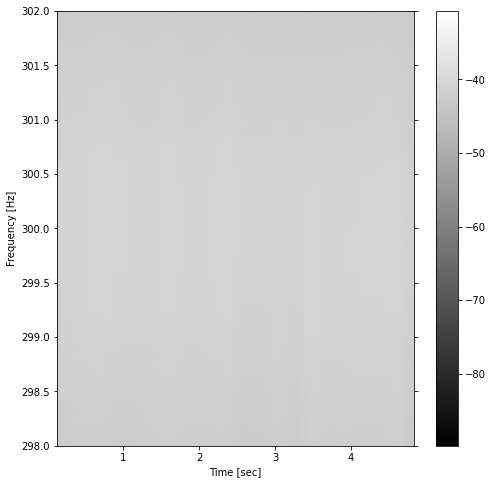

In [45]:
starting_value = 20700
for i in range(starting_value, starting_value+1):#total_windows):
    spectrum_check = "_0_"
    window_start = int(i*shift_size*fs)
    window_end = int(window_start+(window_size*fs))
    sampled_data = power_signal_recording_0[window_start:window_end]
    f, t, P = signal.spectrogram(sampled_data, nfft=nfft, fs=fs,mode='magnitude')
    plt.figure(figsize=(8,8),facecolor='white')
 #   plt.pcolormesh(t, f, P, shading='gouraud', cmap = 'gray')
    plt.pcolormesh(t, f, 10*np.log10(P), shading='gouraud', cmap = 'gray')
    #plt.ylim(118,122)
    plt.ylim(298,302)
   # plt.ylim(80,160)
    #plt.ylim(10,200)
    plt.tick_params(left = True, right = True, labelleft = True ,
                        labelbottom = True, bottom = True)
    plt.xlabel('Time [sec]')
    plt.ylabel('Frequency [Hz]')
    #file_name = "/home/adilet/temp/recording_"+ str(i) + ".png"
    file_name = "/home/adilet/pyenf_dnn/defense_images/spectrograms/example_enf_4.png"
    plt.colorbar()
    #plt.show()
    plt.savefig(file_name)